# Set up
Run the cell below to install all of the necessary packages (should take ~45 seconds).

In [1]:
#@title Set up script { display-mode: "form" }
#@markdown Run this cell to install the necessary packages.
%%shell
rm -rf /content/inverse-scaling-eval-pipeline
cd /content
pip uninstall -y eval-pipeline
git clone -b public-colab --single-branch https://github.com/ed1d1a8d/inverse-scaling-eval-pipeline.git &> /dev/null
pip install git+https://github.com/ed1d1a8d/inverse-scaling-eval-pipeline.git@public-colab &> /dev/null

# somehow these commands fix matplotlib to draw in the notebook
# https://stackoverflow.com/questions/64862818/cannot-import-name-png-from-matplotlib
%matplotlib inline
python -m pip uninstall matplotlib -y
pip install matplotlib==3.1.3 &> /dev/null


/bin/bash: line 8: fg: no job control
Found existing installation: matplotlib 3.5.3
Uninstalling matplotlib-3.5.3:
  Successfully uninstalled matplotlib-3.5.3


# Set OpenAI key (optional)

If you will be evaluating on OpenAI GPT models, change the key below to you actual key and (re-)run the cell. (Don't use quotes!)

In [ ]:
%env OPENAI_API_KEY=sk-XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX                    

# Run scaling experiments

1. Choose from the evaluation metrics `classification`, `sequence_prob`, `logodds`, and `absolute_logodds`.
   
   Descriptions of the evaluation metrics can be found in [this section of the README](https://github.com/inverse-scaling/prize).

2. Upload a file to the colab and set `file_name` to the file you just uploaded.

3. Select models on which you want to evaluate scaling (you can mix OPT and GPT models if you want!)

  - OPT models: `["opt-125m", "opt-350m", "opt-1.3b", "opt-2.7b", "opt-6.7b", "opt-13b"]`
  - GPT models: `["ada", "babbage", "curie", "davinci"]`
  - Instruct GPT models (w/ RLHF): `["text-ada-001", "text-babbage-001", "text-curie-001", "text-davinci-001"]`
  - [Complete list available models and their corresponding sizes](https://github.com/ed1d1a8d/inverse-scaling-eval-pipeline/blob/d7b0de68258525fddb2fb1f05091755ebaa24775/eval_pipeline/plot_loss.py#L19).

In [ ]:
#@title Run models and store results { display-mode: "form" }
#@markdown Specify the fields below and run this cell. The evaluation results will be in the /content/results folder.
evaluation_metric = "classification" #@param ["classification", "sequence_prob", "logodds", "absolute_logodds", "classification_acc"]
file_name = "inverse-scaling-eval-pipeline/data/test/classification.csv" #@param {"type": "string"}
model_names = ["opt-125m", "opt-350m", "babbage", "curie", "davinci"] #@param {"type": "raw"}
model_names_string = ' '.join(model_names)

%run /content/inverse-scaling-eval-pipeline/eval_pipeline/main.py \
--dataset-path "/content/$file_name" \
--exp-dir /content/results \
--models $model_names_string \
--task-type $evaluation_metric \
--batch-size 100 \
--use-gpu

# Plot results

{0: ({'babbage': 0.6465635678487995,
      'curie': 0.5469317791652767,
      'davinci': 0.3858270420865552,
      'opt-125m': 1.2935533390186141e-05,
      'opt-350m': 0.00020984088551325006},
     3)}


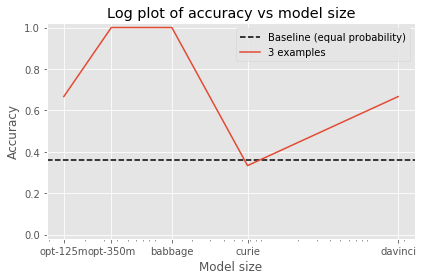

In [4]:
### Plot accuracy
%run /content/inverse-scaling-eval-pipeline/eval_pipeline/plot_loss.py \
  /content/results \
  --task-type classification_acc

{0: ({'babbage': 0.6465635678487995,
      'curie': 0.5469317791652767,
      'davinci': 0.3858270420865552,
      'opt-125m': 1.2935533390186141e-05,
      'opt-350m': 0.00020984088551325006},
     3)}


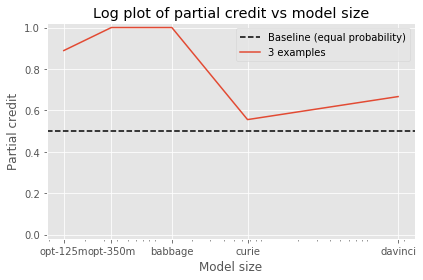

In [5]:
### Plot accuracy w/ partial credit
%run /content/inverse-scaling-eval-pipeline/eval_pipeline/plot_loss.py \
  /content/results \
  --task-type classification_partial

(125000000, 350000000, 1300000000, 6700000000, 175000000000) (0.6065727521975836, 0.6723946134249369, 0.7531870305538177, 1.1058655381202698, 1.0002290805180867) (0.19334176875263376, 0.04079046991657077, 0.16927644007160422, 0.17773440305969057, 0.13752924164284655)
{0: ({'babbage': 0.6465635678487995,
      'curie': 0.5469317791652767,
      'davinci': 0.3858270420865552,
      'opt-125m': 1.2935533390186141e-05,
      'opt-350m': 0.00020984088551325006},
     3)}


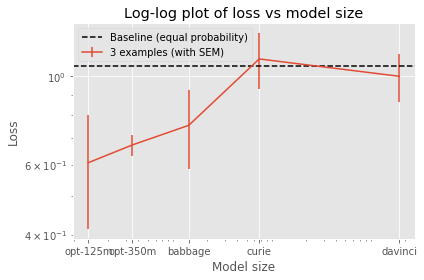

In [6]:
### Plot loss
%run /content/inverse-scaling-eval-pipeline/eval_pipeline/plot_loss.py \
  /content/results \
  --task-type classification_loss